In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder,MinMaxScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F

/Users/msughter/anaconda3/envs/poolenv/lib/python3.10/site-packages/threadpoolctl.py:1214: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


In [2]:
# df = pd.read_excel('/Users/msughter/projects/employee_turnover/Expanded_Workers_Turnover_Data.xlsx')
df = pd.read_excel('Expanded_Workers_Turnover_Data_1000.xlsx')

In [3]:
df.head()

,ID,Start time,Completion time,Email,Name,Last modified time,Gender,Age,Marital Status,Level of Education,...,Intent to LeaveI frequently think about leaving my current organization.,Intent to LeaveI have explored job opportunities outside my current organization.\n,Intent to LeaveI will likely leave this organization in the next 12 months if the opportunity arises.,Reasons for Potential TurnoverInadequate compensation is a major reason I would consider leaving.\n,Reasons for Potential TurnoverLack of career advancement opportunities is a major reason I would consider leaving.\n,Reasons for Potential TurnoverUnsatisfactory work environment or organizational culture is a major reason I would consider leaving.\n\n,Reasons for Potential TurnoverFamily responsibilities or relocation concerns significantly influence my decision to stay or leave.\n,External Factors The current economic situation in Nigeria affects my decision to stay or leave.,External Factors The availability of better job opportunities in the market would encourage me to change my job.\n,I have left an organization for similar reasons as stated above.
0,13,2025-01-06 11:43:18,2025-01-06 11:48:27,anonymous,NaN,NaN,Male,25 -34 years,Married,HND/BSc/Equivalent,...,5,5,2,1.0,5.0,5.0,1.0,1.0,5.0,Yes
1,49,2025-01-07 08:39:37,2025-01-07 08:45:37,anonymous,NaN,NaN,Male,25 -34 years,Single,HND/BSc/Equivalent,...,3,3,3,3.0,3.0,3.0,4.0,4.0,3.0,No
2,40,2025-01-06 21:55:05,2025-01-06 21:57:19,anonymous,NaN,NaN,Male,25 -34 years,Single,Senior Secondary School Certificate /Equivalent,...,3,2,4,3.0,4.0,5.0,3.0,2.0,5.0,Yes
3,32,2025-01-06 15:58:48,2025-01-06 16:10:24,anonymous,NaN,NaN,Male,Under 25 years,Single,HND/BSc/Equivalent,...,1,1,1,3.0,3.0,3.0,3.0,1.0,1.0,No
4,54,2025-01-07 09:48:06,2025-01-07 10:15:03,anonymous,NaN,NaN,Male,35 -44 years,Single,HND/BSc/Equivalent,...,4,4,4,5.0,5.0,1.0,5.0,5.0,5.0,No


In [4]:
len(df.columns)

40

In [5]:
df.shape

(1000, 40)

In [6]:
df['Last modified time'].isnull().sum()

1000

### remove all columns that are not by intuition relevant to predicting workers turnover such as start time, completion time, email, name, last modified time

In [7]:
# all the columns not relevant to the prediction

df.pop('Last modified time')
df.pop('Start time')
df.pop('Completion time')
df.pop('Email')
df.pop('Name')
#

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
995   NaN
996   NaN
997   NaN
998   NaN
999   NaN
Name: Name, Length: 1000, dtype: float64

In [8]:
df.head()

,ID,Gender,Age,Marital Status,Level of Education,Work Experience (in years),Number of Previous Organisation worked for,Current Job Level,Job Security: I feel secure in my current job position.,Job Security: Management clearly communicates policies that ensure job stability.,...,Intent to LeaveI frequently think about leaving my current organization.,Intent to LeaveI have explored job opportunities outside my current organization.\n,Intent to LeaveI will likely leave this organization in the next 12 months if the opportunity arises.,Reasons for Potential TurnoverInadequate compensation is a major reason I would consider leaving.\n,Reasons for Potential TurnoverLack of career advancement opportunities is a major reason I would consider leaving.\n,Reasons for Potential TurnoverUnsatisfactory work environment or organizational culture is a major reason I would consider leaving.\n\n,Reasons for Potential TurnoverFamily responsibilities or relocation concerns significantly influence my decision to stay or leave.\n,External Factors The current economic situation in Nigeria affects my decision to stay or leave.,External Factors The availability of better job opportunities in the market would encourage me to change my job.\n,I have left an organization for similar reasons as stated above.
0,13,Male,25 -34 years,Married,HND/BSc/Equivalent,4 -6 years,3,Senior staff (Levels 7 above),2,2,...,5,5,2,1.0,5.0,5.0,1.0,1.0,5.0,Yes
1,49,Male,25 -34 years,Single,HND/BSc/Equivalent,1 -3 years,1,Senior staff (Levels 7 above),4,4,...,3,3,3,3.0,3.0,3.0,4.0,4.0,3.0,No
2,40,Male,25 -34 years,Single,Senior Secondary School Certificate /Equivalent,1 -3 years,1,Junior staff (Levels 1 -6),3,2,...,3,2,4,3.0,4.0,5.0,3.0,2.0,5.0,Yes
3,32,Male,Under 25 years,Single,HND/BSc/Equivalent,4 -6 years,1,Junior staff (Levels 1 -6),1,1,...,1,1,1,3.0,3.0,3.0,3.0,1.0,1.0,No
4,54,Male,35 -44 years,Single,HND/BSc/Equivalent,4 -6 years,2,Junior staff (Levels 1 -6),1,1,...,4,4,4,5.0,5.0,1.0,5.0,5.0,5.0,No


### rename all columns to numbers for ease of reading


In [9]:
features = df.columns
df = df.set_axis([i for i in range(len(df.columns))] ,axis=1)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,13,Male,25 -34 years,Married,HND/BSc/Equivalent,4 -6 years,3,Senior staff (Levels 7 above),2,2,...,5,5,2,1.0,5.0,5.0,1.0,1.0,5.0,Yes
1,49,Male,25 -34 years,Single,HND/BSc/Equivalent,1 -3 years,1,Senior staff (Levels 7 above),4,4,...,3,3,3,3.0,3.0,3.0,4.0,4.0,3.0,No
2,40,Male,25 -34 years,Single,Senior Secondary School Certificate /Equivalent,1 -3 years,1,Junior staff (Levels 1 -6),3,2,...,3,2,4,3.0,4.0,5.0,3.0,2.0,5.0,Yes
3,32,Male,Under 25 years,Single,HND/BSc/Equivalent,4 -6 years,1,Junior staff (Levels 1 -6),1,1,...,1,1,1,3.0,3.0,3.0,3.0,1.0,1.0,No
4,54,Male,35 -44 years,Single,HND/BSc/Equivalent,4 -6 years,2,Junior staff (Levels 1 -6),1,1,...,4,4,4,5.0,5.0,1.0,5.0,5.0,5.0,No


In [10]:
# drop na values
df=df.dropna()

In [11]:
y= df.pop(34)
X = df

In [12]:
# get all the categorical columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()


In [13]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,13,Male,25 -34 years,Married,HND/BSc/Equivalent,4 -6 years,3,Senior staff (Levels 7 above),2,2,...,1.0,5,5,2,1.0,5.0,5.0,1.0,1.0,5.0
1,49,Male,25 -34 years,Single,HND/BSc/Equivalent,1 -3 years,1,Senior staff (Levels 7 above),4,4,...,4.0,3,3,3,3.0,3.0,3.0,4.0,4.0,3.0
2,40,Male,25 -34 years,Single,Senior Secondary School Certificate /Equivalent,1 -3 years,1,Junior staff (Levels 1 -6),3,2,...,4.0,3,2,4,3.0,4.0,5.0,3.0,2.0,5.0
3,32,Male,Under 25 years,Single,HND/BSc/Equivalent,4 -6 years,1,Junior staff (Levels 1 -6),1,1,...,1.0,1,1,1,3.0,3.0,3.0,3.0,1.0,1.0
4,54,Male,35 -44 years,Single,HND/BSc/Equivalent,4 -6 years,2,Junior staff (Levels 1 -6),1,1,...,4.0,4,4,4,5.0,5.0,1.0,5.0,5.0,5.0


In [14]:
y.head()

0    Yes
1     No
2    Yes
3     No
4     No
Name: 34, dtype: object

In [15]:
discrete_mask = X.dtypes == int 

In [16]:
discrete_mask

0      True
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8      True
9      True
10     True
11    False
12     True
13     True
14    False
15    False
16    False
17     True
18    False
19    False
20    False
21    False
22     True
23     True
24    False
25     True
26     True
27     True
28    False
29    False
30    False
31    False
32    False
33    False
dtype: bool

In [17]:
# Encode categorical features
encoder = OrdinalEncoder()
X[categorical_features] = encoder.fit_transform(X[categorical_features])

# Encode target
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


In [18]:
# deal with Nan values
X=X.dropna()

In [19]:
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_classif(X, y_encoded, discrete_features=discrete_mask)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [20]:
mi_scores =make_mi_scores(X,y,discrete_mask)
mi_scores

0     0.693127
29    0.170783
27    0.131680
30    0.111588
26    0.107047
5     0.098841
33    0.080233
28    0.068986
10    0.063624
21    0.047061
11    0.045566
2     0.044669
16    0.040323
9     0.038796
7     0.038173
8     0.035536
6     0.032610
14    0.031148
17    0.029993
31    0.026301
18    0.024093
12    0.018530
23    0.016147
25    0.009936
4     0.007622
15    0.007482
20    0.006018
13    0.003092
24    0.002371
32    0.001773
22    0.001627
19    0.000000
1     0.000000
3     0.000000
Name: MI Scores, dtype: float64

In [21]:
mi_scores > 0.1

0      True
29     True
27     True
30     True
26     True
5     False
33    False
28    False
10    False
21    False
11    False
2     False
16    False
9     False
7     False
8     False
6     False
14    False
17    False
31    False
18    False
12    False
23    False
25    False
4     False
15    False
20    False
13    False
24    False
32    False
22    False
19    False
1     False
3     False
Name: MI Scores, dtype: bool

In [22]:
THRESH_HOLD = 0.04
mi_scores_above_threshold = mi_scores[mi_scores > THRESH_HOLD ].index.to_list()
mi_scores_above_threshold

[0, 29, 27, 30, 26, 5, 33, 28, 10, 21, 11, 2, 16]

In [23]:
names_of_columns_above_threshold = [ features[i] for i in mi_scores_above_threshold ]

In [24]:
names_of_columns_above_threshold

['ID',
 'Reasons for Potential TurnoverLack of career advancement opportunities is a major reason I would       consider leaving.\n',
 'Intent to LeaveI will likely leave this organization in the next 12 months if the       opportunity arises.',
 'Reasons for Potential TurnoverUnsatisfactory work environment or organizational culture is a       major reason I would consider leaving.\n\n',
 'Intent to LeaveI have explored job opportunities outside my current organization.\n',
 'Work Experience (in years)',
 'External Factors  The availability of better job opportunities in the market would encourage me to change my job.\n',
 'Reasons for Potential TurnoverInadequate compensation is a major reason I would consider       leaving.\n',
 'Compensation and Benefits: My\xa0salary is competitive compared to similar positions in other organizations',
 'Leadership StyleManagement style in my organization motivates me to perform at my       best.\n',
 'Compensation and Benefits:     I am satisfied

#### From the above result we can see that the following columns have a strong correlation to potential turnover
* Reasons for Potential Turnover: Lack of career advancement opportunities is a major reason I would consider leaving.
* Intent to LeaveI will likely leave this organization in the next 12 months if the opportunity arises.
* Reasons for Potential Turnover Unsatisfactory work environment or organizational culture is a major reason I would consider leaving.
* Compensation and Benefits:     I am satisfied with the non-monetary benefits (e.g., health insurance, pension scheme) offered by my employer. 
* Compensation and Benefits: My salary is competitive compared to similar positions in other organizations.
* Number of Previous Organisation worked for.
* Job Satisfaction: I am satisfied with my current role and responsibilities.  
* Work Experience (in years).
* Job Satisfaction: I am satisfied with my current role and responsibilities.
* Leadership StyleManagement style in my organization motivates me to perform at my best.
* Intent to Leave I have explored job opportunities outside my current organization.
* Recognition and RewardI am recognized when I preform well.
* External Factors  The availability of better job opportunities in the market would encourage me to change my job.
  

### With mutual information we reduced our columns to 13. which are more relevant to predicting employee turnover

In [25]:
X=X[mi_scores_above_threshold]

In [26]:
X

,0,29,27,30,26,5,33,28,10,21,11,2,16
0,13,5.0,2,5.0,5,1.0,5.0,1.0,3,2.0,3.0,0.0,3.0
1,49,3.0,3,3.0,3,0.0,3.0,3.0,4,3.0,4.0,0.0,3.0
2,40,4.0,4,5.0,2,0.0,5.0,3.0,2,4.0,2.0,0.0,3.0
3,32,3.0,1,3.0,1,1.0,1.0,3.0,1,5.0,1.0,4.0,3.0
4,54,5.0,4,1.0,4,1.0,5.0,5.0,1,1.0,4.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,26,1.0,1,1.0,1,0.0,5.0,1.0,4,5.0,1.0,0.0,4.0
996,58,4.0,4,5.0,4,4.0,3.0,4.0,1,3.0,1.0,1.0,1.0
997,55,1.0,1,1.0,2,4.0,1.0,1.0,4,4.0,4.0,2.0,3.0
998,17,5.0,1,4.0,1,4.0,1.0,2.0,3,4.0,3.0,1.0,5.0


<Axes: >

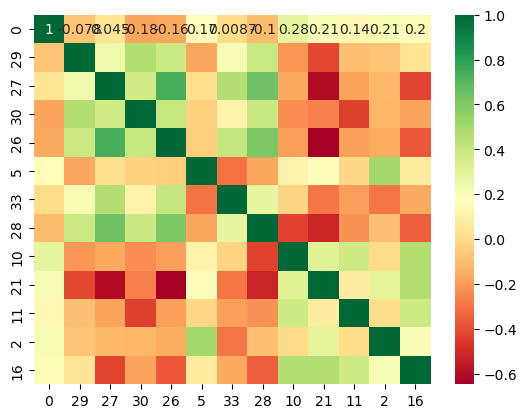

In [27]:
sns.heatmap(X.corr(),cmap="RdYlGn",annot=True)

In [28]:
# pop the ID colum -> column 0 which is also not relevant to worker turnover
X.pop(0)

0      13
1      49
2      40
3      32
4      54
       ..
995    26
996    58
997    55
998    17
999    39
Name: 0, Length: 787, dtype: int64

In [29]:
# create the scaler
input_scaler = MinMaxScaler()
output_scaler = MinMaxScaler()
# scale the inputs to be in the range of 0 -> 1
scaled_x = input_scaler.fit_transform(X)



In [30]:
# convert the data to tensors
# X_ = torch.tensor(scaled_x)
# y_ = torch.tensor(y_encoded)
# X_ = torch.tensor(scaled_x,dtype=torch.float32)
# y_ = torch.tensor(y_encoded,dytpe=torch.float32)

# X_ = torch.from_numpy(scaled_x.astype(np.float32))
# y_ = torch.from_numpy(y_encoded.astype(np.float32))

X_train, X_test, y_train, y_test = train_test_split(scaled_x, y_encoded, test_size=0.2, random_state=42)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))

y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))



In [31]:
# Define the perceptron neural network
# Define the Perceptron model
class Perceptron(nn.Module):
    def __init__(self, input_dim):
        super(Perceptron, self).__init__()
        self.linear = nn.Linear(input_dim, 1)  # Linear layer with 1 output (for binary classification)
        
    def forward(self, x):
        return self.linear(x)

In [32]:
input_dim = X.shape[1] 
model = Perceptron(input_dim)

In [33]:
# Define loss function and optimizer
criterion = nn.BCEWithLogitsLoss()  # Binary Cross-Entropy with logits
optimizer = optim.SGD(model.parameters(), lr=0.03)

Epoch [10/100], Loss: 0.7000, Test Accuracy: 0.4747
Epoch [20/100], Loss: 0.6964, Test Accuracy: 0.4810
Epoch [30/100], Loss: 0.6942, Test Accuracy: 0.4873
Epoch [40/100], Loss: 0.6927, Test Accuracy: 0.5316
Epoch [50/100], Loss: 0.6917, Test Accuracy: 0.5380
Epoch [60/100], Loss: 0.6908, Test Accuracy: 0.5886
Epoch [70/100], Loss: 0.6901, Test Accuracy: 0.5886
Epoch [80/100], Loss: 0.6894, Test Accuracy: 0.5886
Epoch [90/100], Loss: 0.6888, Test Accuracy: 0.5886
Epoch [100/100], Loss: 0.6882, Test Accuracy: 0.5633


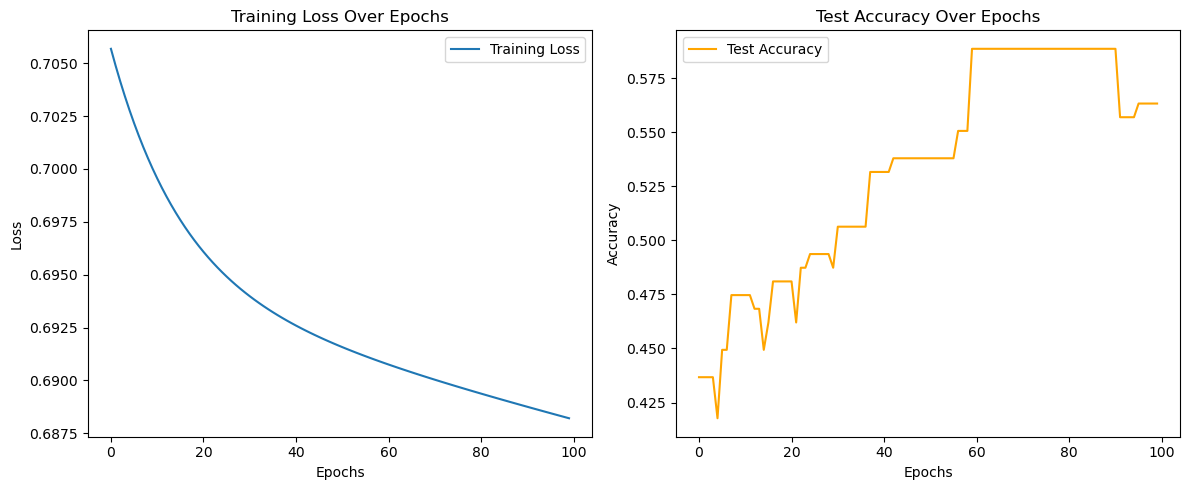

In [34]:
# Variables to store metrics
train_losses = []
test_accuracies = []

# Training the perceptron
epochs = 100
for epoch in range(epochs):
    # Training phase
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs.squeeze(), y_train.float())
    loss.backward()
    optimizer.step()
    
    # Store training loss
    train_losses.append(loss.item())
    
    # Evaluation phase
    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test)
        predictions = torch.sigmoid(test_outputs).squeeze() > 0.5
        accuracy = accuracy_score(y_test, predictions.numpy())
        test_accuracies.append(accuracy)
    
    # Print metrics every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}, Test Accuracy: {accuracy:.4f}")

# Plot metrics
plt.figure(figsize=(12, 5))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(range(epochs), train_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()

# Plot test accuracy
plt.subplot(1, 2, 2)
plt.plot(range(epochs), test_accuracies, label='Test Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Test Accuracy Over Epochs')
plt.legend()

plt.tight_layout()
plt.show()